# Getting started with ivpy

ivpy is a Python module for plotting iconographic data. For now, this means anything stored as an image file. The basic module API is extremely simple. Once users have their data loaded (using pandas), they can attach a dataframe to the global environment using attach( ) and then visualize it using one of four plot functions: show( ), montage( ), histogram( ), and scatter( ). 

## Loading data

First, we'll need to import Python's data management module, pandas, which gives us a dataframe object. If you've used the statistical programming language R, pandas will seem very familiar.

In [23]:
import pandas as pd

We will then load the Oxford Flower dataset:

In [24]:
df = pd.read_csv("oxfordflower.csv")

In [25]:
df.head()

,filename,flowername,hue,brightness,saturation
0,image_0001.jpg,daffodil,50.0,0.395750,0.442842
1,image_0002.jpg,daffodil,43.0,0.356408,0.393743
2,image_0003.jpg,daffodil,56.0,0.542770,0.556569
3,image_0004.jpg,daffodil,337.0,0.722993,0.390555
4,image_0005.jpg,daffodil,50.0,0.486240,0.767781


#### Localizing image paths

We can see, by peeking at the dataframe using the 'head( )' method, that our image filenames are not full, local file paths. We'll need to modify the column 'filename' so that it contains full paths: 

In [26]:
DIR = "/mnt/e/Tasks/similarity/Images/jpg/" # replace this path with your local Oxford Flower folder

In [27]:
df.filename = [DIR+item for item in df.filename]

In [28]:
df.head()

,filename,flowername,hue,brightness,saturation
0,/mnt/e/ivpy/Images/jpg/image_0001.jpg,daffodil,50.0,0.395750,0.442842
1,/mnt/e/ivpy/Images/jpg/image_0002.jpg,daffodil,43.0,0.356408,0.393743
2,/mnt/e/ivpy/Images/jpg/image_0003.jpg,daffodil,56.0,0.542770,0.556569
3,/mnt/e/ivpy/Images/jpg/image_0004.jpg,daffodil,337.0,0.722993,0.390555
4,/mnt/e/ivpy/Images/jpg/image_0005.jpg,daffodil,50.0,0.486240,0.767781


Okay good. We can see that the column 'filename' has been changed.

## Attaching dataframe to global environment

Now that our data is loaded and ready, let's attach our dataframe to the global environment. You don't have to do this, but it will allow us to refer to the columns of our dataframe ('df') more concisely. But first, we'll need to import the attach( ) function from ivpy, and while we're at it, we'll also import the plotting functions, too.

In [29]:
from ivpy import attach,show,montage,histogram,scatter

In [30]:
attach(df,'filename')

Note that in calling attach( ), we specify not only the dataframe itself but also the column that has the filepaths.

## Plotting basics

Okay, we are ready to plot! In this notebook, we'll only cover basic usage. Tutorials 1 through 4 will explore each plot type in detail.

### show( )

show( ) generates a scrollable, rectangular montage of images. If you pass no arguments to the function, it just plots every image in the attached dataframe.

In [31]:
show()

### montage( )

Passed without any special settings, montage( ) generates a square montage of images, in whatever way they are ordered in the dataframe.

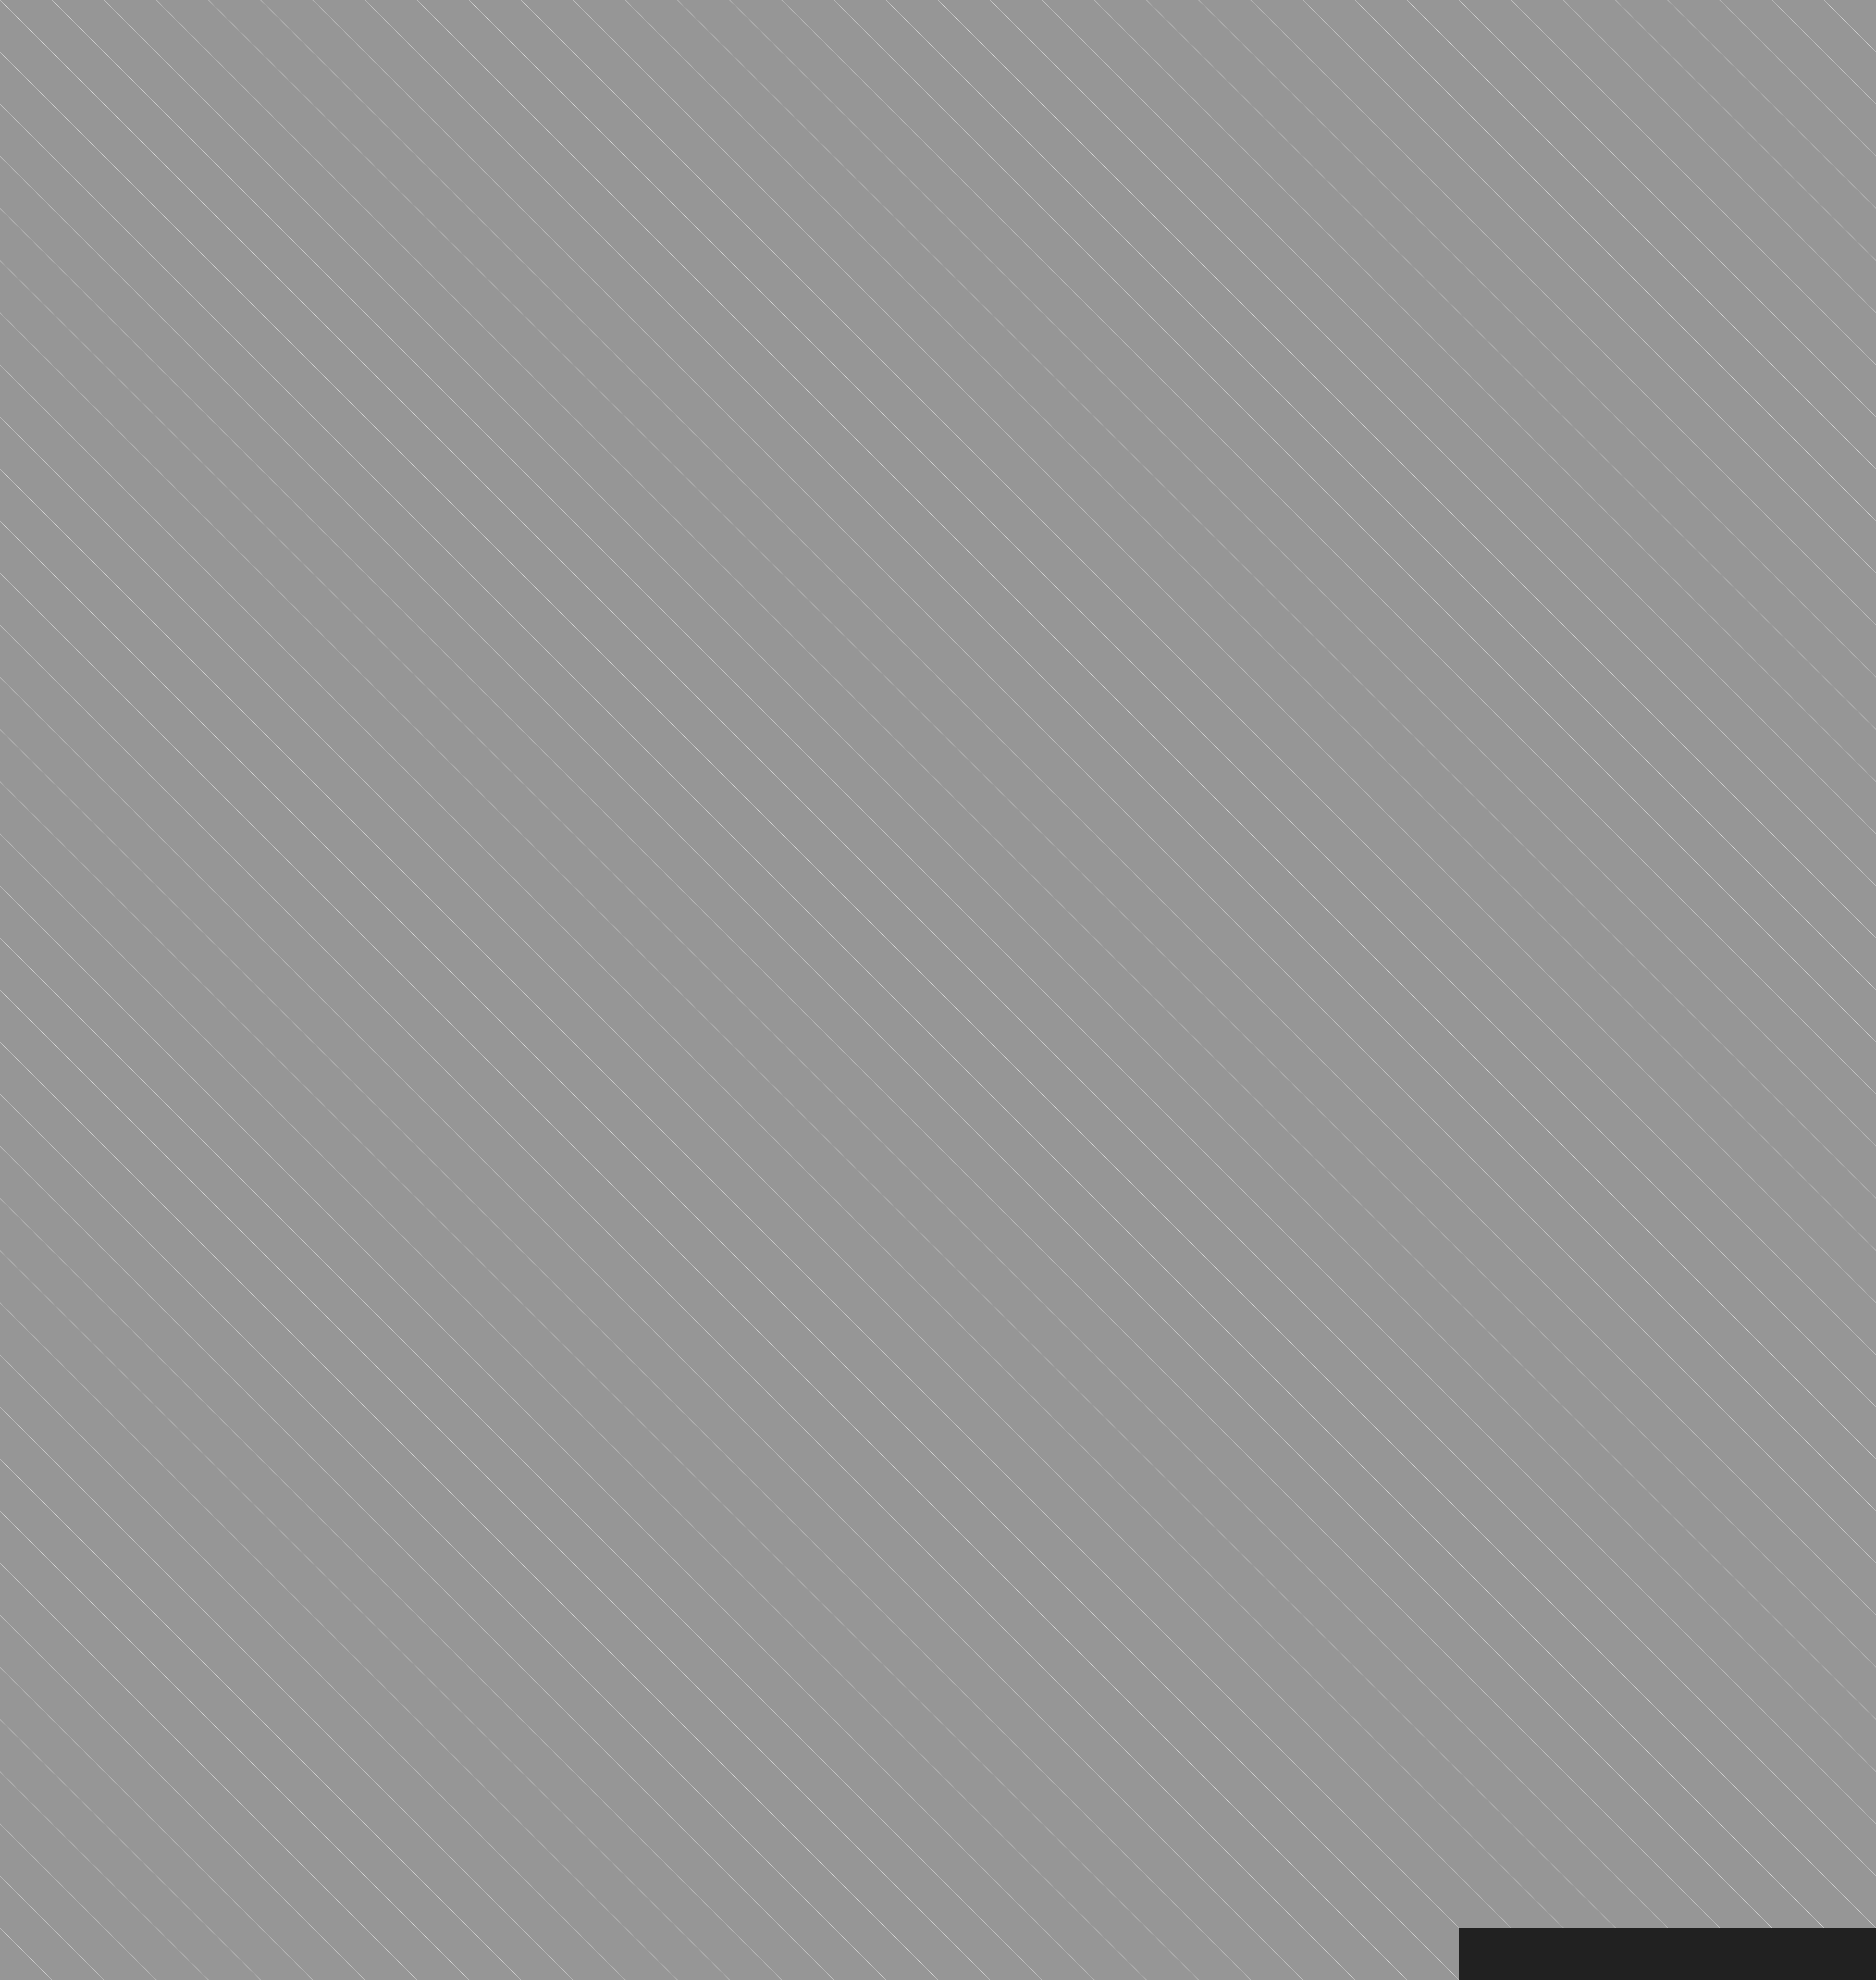

In [ ]:
montage()

### histogram( )

Unlike show( ) and montage( ), histogram( ) plots along a proper axis, and so we'll need to pass an argument to the function that tells it which column to use as an axis. The resulting plot will show the binned distribution of values on that axis. Though we don't have to, we'll tell it how many bins to use as well.

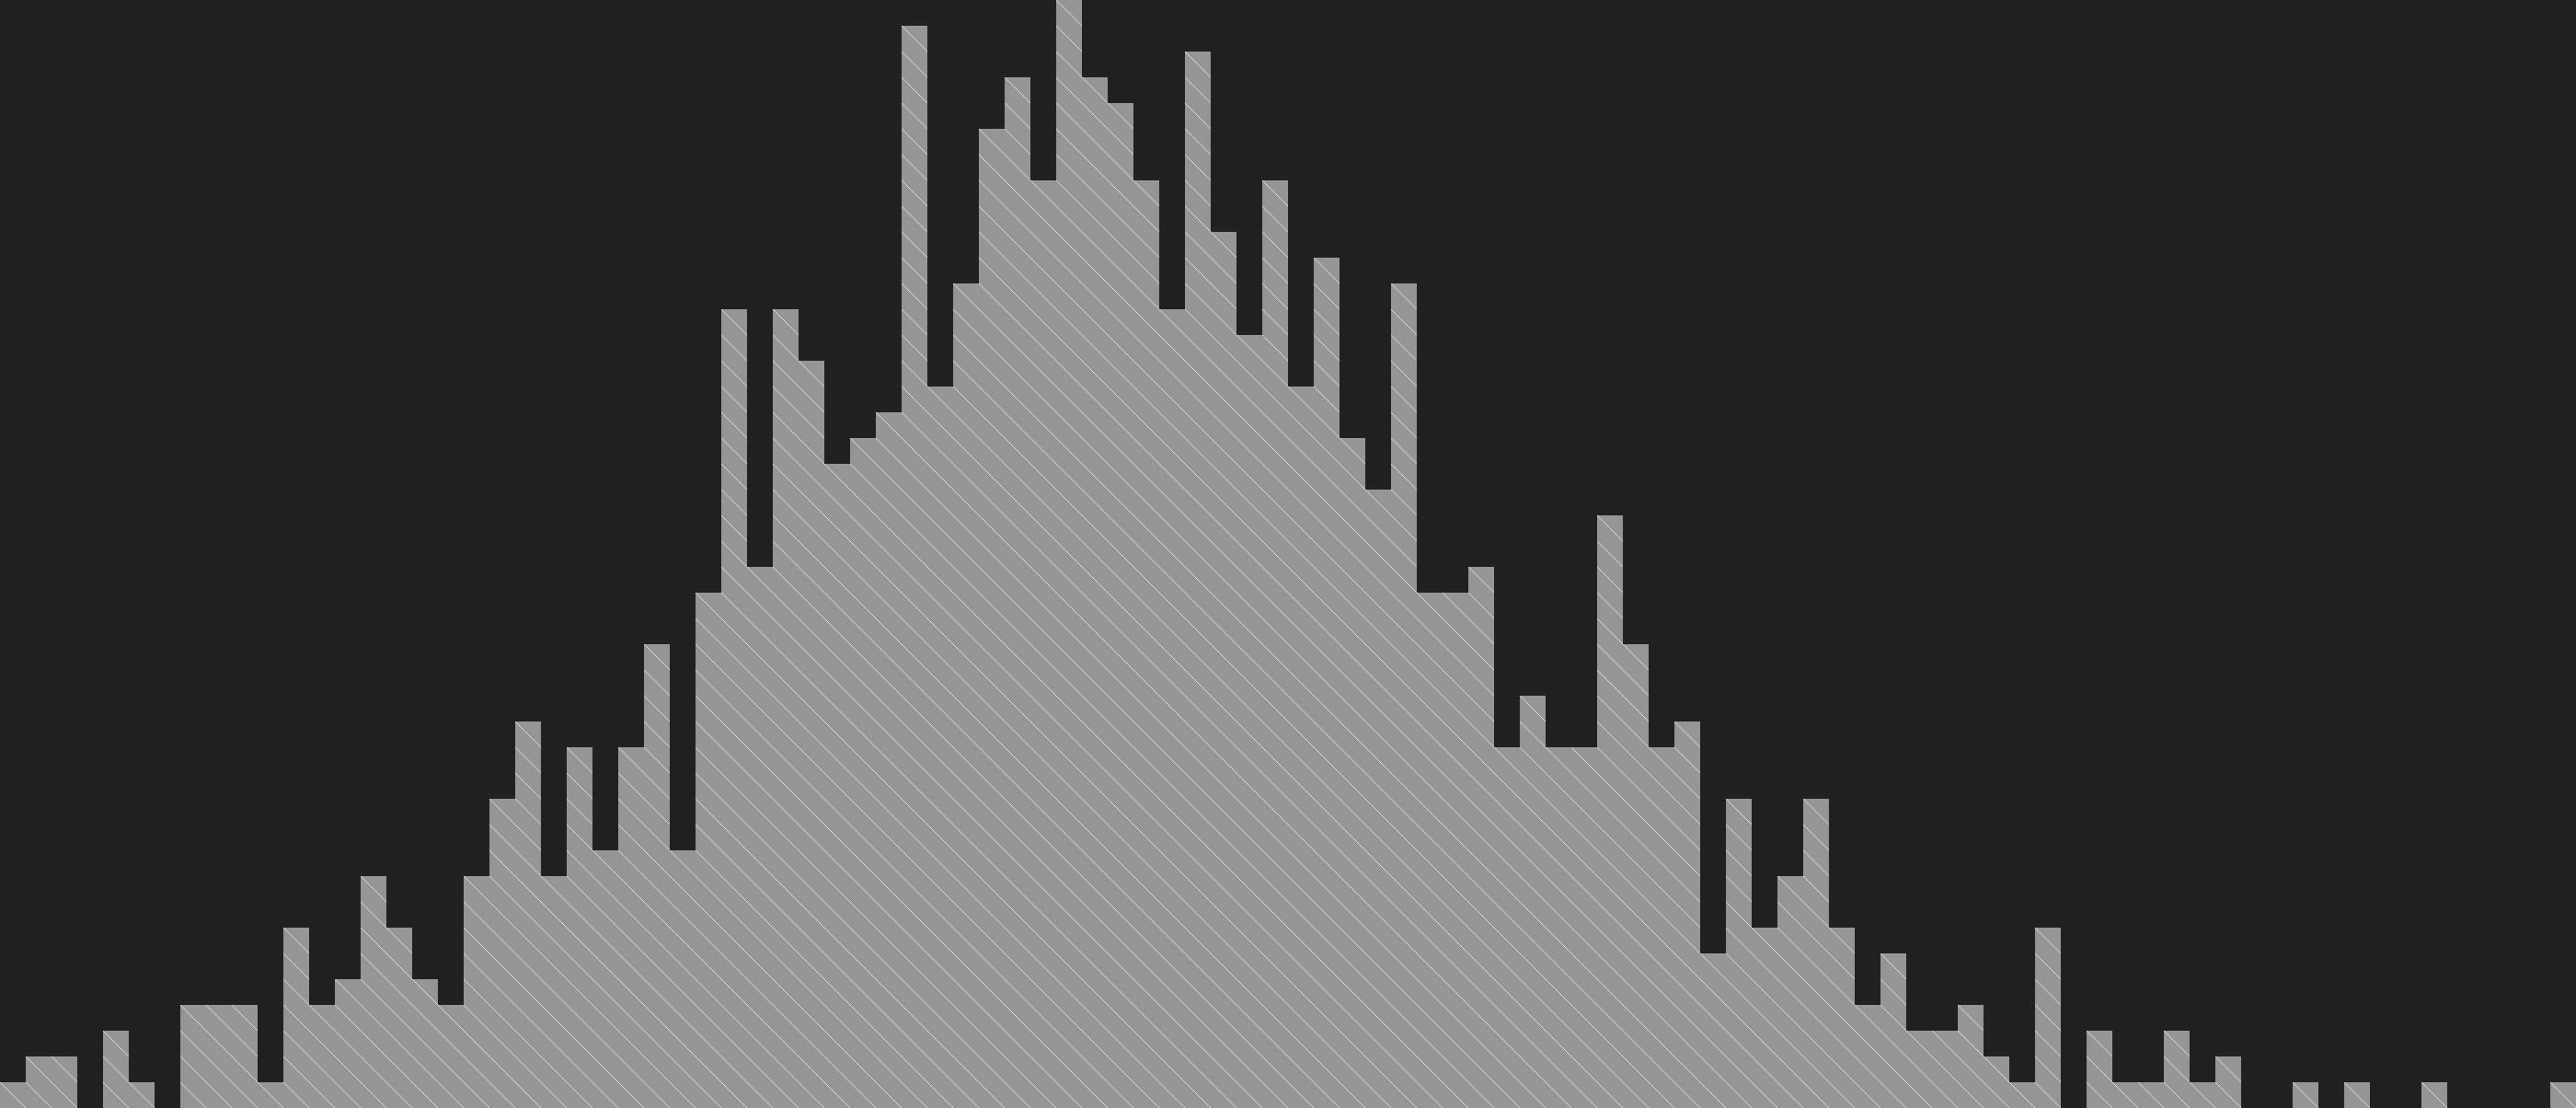

In [ ]:
histogram(xcol='brightness',bins=100)

### scatter( )

scatter( ) generates a scatterplot, so we'll need to specify both an x-axis and a y-axis.

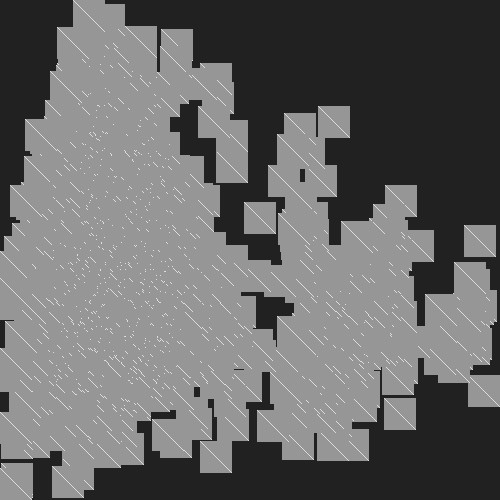

In [ ]:
scatter(xcol='hue',ycol='saturation')

## Composing and Saving

Two final operations bear mentioning here: compose( ) and .save( ):

### compose( )

If the user wants to see plots side-by-side, or several together in a grid, she will use compose( ). This function takes plots as arguments and outputs a metaplot:

In [ ]:
from ivpy import compose

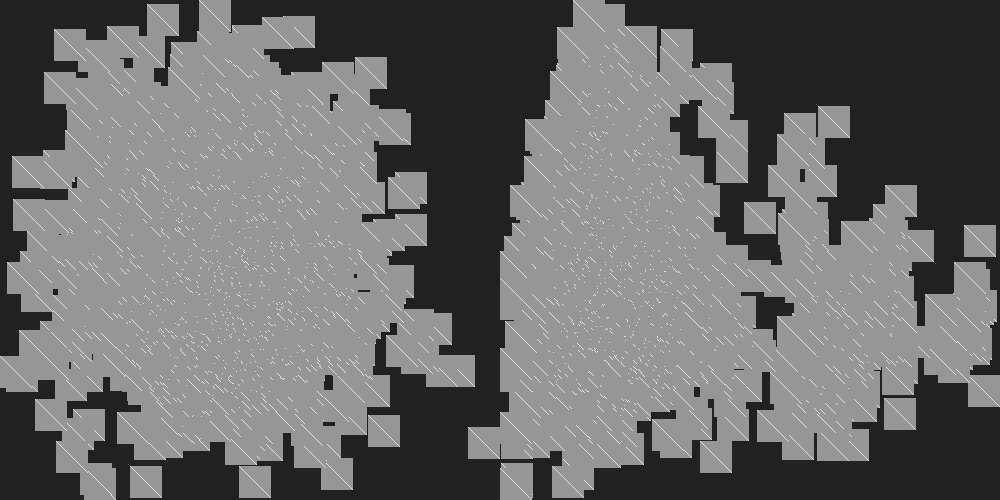

In [ ]:
compose(scatter('brightness','saturation'),scatter('hue','saturation'))

You can also assign any plot to a variable and pass those to compose( ):

In [ ]:
plot1 = scatter('brightness','saturation')
plot2 = scatter('hue','saturation')

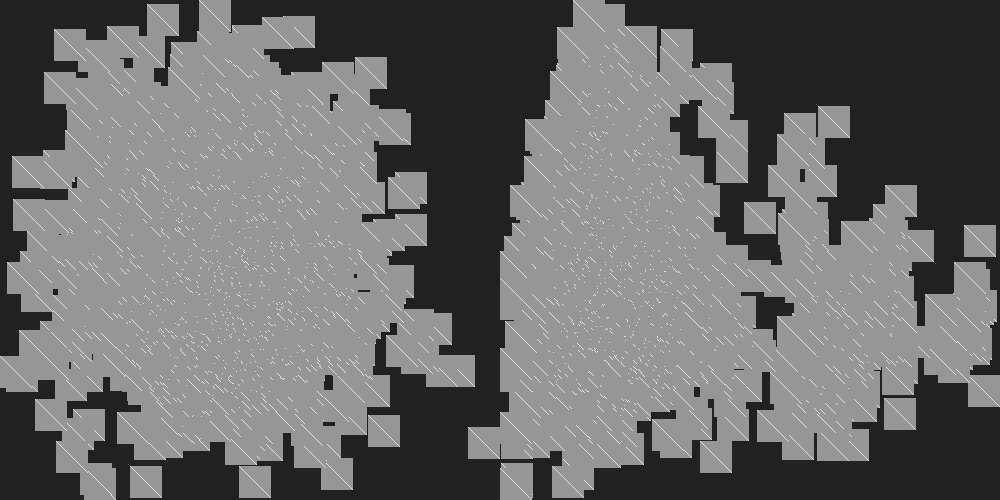

In [ ]:
compose(plot1,plot2)

### .save(  )

Because ivpy is built atop the Python Imaging Library, and all ivpy plots are instances of its Image class, all ivpy plots are saveable using its .save( ) method. The user can append .save( ) to any plot function call or any plot saved as a variable: 

In [ ]:
import os
HOMEDIR = os.path.expanduser("~")

In [ ]:
scatter('hue','saturation').save("/mnt/e/Tasks/similarity/src/plots/teste.png")

In [ ]:
myplot = scatter('hue','saturation')
myplot.save("/mnt/e/Tasks/similarity/src/plots/teste2.png")

One way this might be particularly useful is in generating plots using a loop and saving them to disk. For example, we might want to look at histograms across 100 different variables, which, done "manually", would be rather onerous. In big data analysis, this kind of mass exploration is common, and ivpy makes it easy. 

## Ahead

That's it for basic usage, but these plots are highly customizable. See subsequent tutorials for the finer points of usage.